# **Bibliotecas

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from copy import deepcopy as cp
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)

warnings.filterwarnings("ignore")
sns.set_style("ticks")
sns.set_context("paper")

    Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".
2 - Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

In [207]:
df = pd.read_csv('Dados/winequalityN.csv')
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [208]:
df_white = df[df.type=="white"].copy().drop(columns= "type")
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [209]:
df_white.shape

(4898, 12)

In [210]:
df_white['opinion'] = (df_white['quality'] > 5).astype(int)
df_white.drop(columns='quality', inplace=True)

In [211]:
df_white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5               NaN         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  opinion  
0         8.8        1  
1         9.5        1  
2        10.1        1  
3         9.9        1  
4         9.9        1  
...       ...      ...  
4893     11.2        1  
4894      9.6        0  
4895      9.4        1  
4896     12.8        1  
4897     11.8        1  

[4898 rows x 12 columns]

3 - Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?


In [212]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4890 non-null   float64
 1   volatile acidity      4891 non-null   float64
 2   citric acid           4896 non-null   float64
 3   residual sugar        4896 non-null   float64
 4   chlorides             4896 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4891 non-null   float64
 9   sulphates             4896 non-null   float64
 10  alcohol               4898 non-null   float64
 11  opinion               4898 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 478.3 KB


In [213]:
df_white = df_white.drop_duplicates().reset_index(drop=True)

<function matplotlib.pyplot.show(close=None, block=None)>

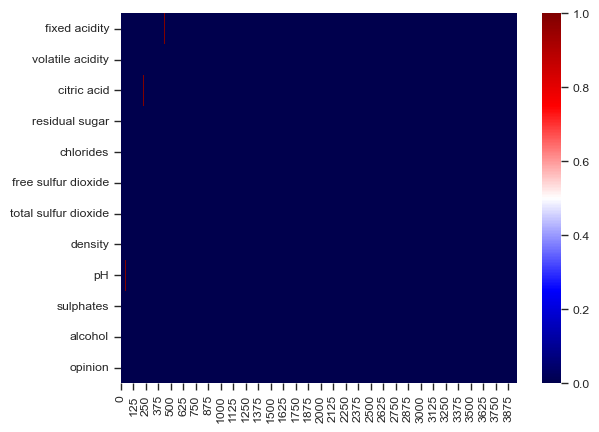

In [214]:
#Verificando dados Nulos em forma Grafica. 
sns.heatmap(df_white.isna().T, vmin=0, vmax=1,cmap='seismic')
plt.show

In [215]:
# Existem dados nulos no Data Frame que devem ser excluidos, por falta de informações do negocios, 
#não vou imputar média, mediana ou qualquer outro artificio para preenchimento dos dados nulos. 

df_white = df_white.dropna()
df_white = df_white.reset_index(drop=True)

In [216]:
df_white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
3937            5.7              0.21         0.32             0.9      0.038   
3938            6.2              0.21         0.29             1.6      0.039   
3939            6.6              0.32         0.36             8.0      0.047   
3940            5.5              0.29         0.30             1.1      0.022   
3941            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
3937                 38.0                 121.0  0.99074  3.24       0.46   
3938                 24.0                  92.0  0.99114  3.27       0.50   
3939                 57.0                 168.0  0.99490  3.15       0.46   
3940                 20.0                 110.0  0.98869  3.34       0.38   
3941                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  opinion  
0         8.8        1  
1         9.5        1  
2        10.1        1  
3         9.9        1  
4         9.6        1  
...       ...      ...  
3937     10.6        1  
3938     11.2        1  
3939      9.6        0  
3940     12.8        1  
3941     11.8        1  

[3942 rows x 12 columns]

In [217]:
df_white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3942.000000       3942.000000  3942.000000     3942.000000   
mean        6.840297          0.280430     0.334490        5.918721   
std         0.866067          0.103256     0.122404        4.861389   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.328750     0.390000        8.875000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3942.000000          3942.000000           3942.000000  3942.000000   
mean      0.045887            34.918062            137.215753     0.993788   
std       0.023088            17.227540             43.128509     0.002907   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991600   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      opinion  
count  3942.000000  3942.000000  3942.000000  3942.000000  
mean      3.195287     0.490236    10.591945     0.659817  
std       0.151345     0.113653     1.217787     0.473831  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.090000     0.410000     9.500000     0.000000  
50%       3.180000     0.480000    10.400000     1.000000  
75%       3.290000     0.550000    11.400000     1.000000  
max       3.820000     1.080000    14.200000     1.000000

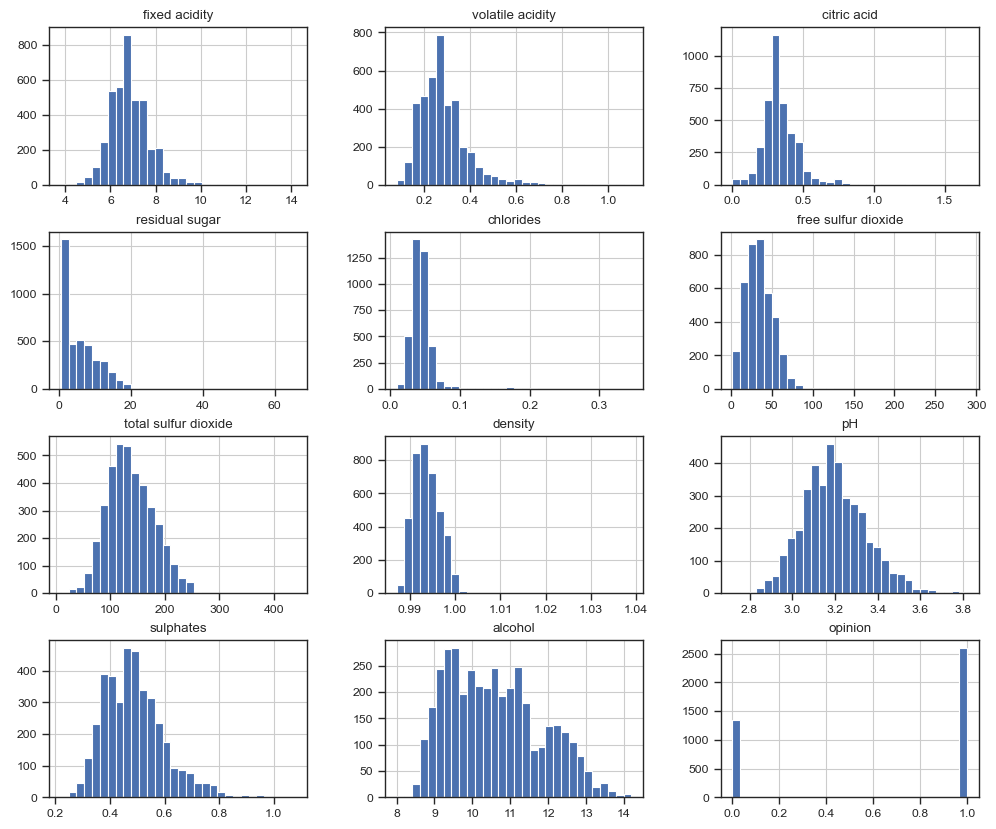

In [218]:
df_white.hist(figsize=(12,10),bins=30);

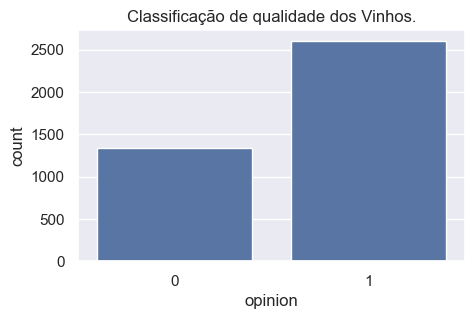

In [219]:
plt.figure(figsize=(5,3))
sns.set(font_scale = 1)
plt.title('Classificação de qualidade dos Vinhos.')
sns.countplot(x=(df_white['opinion']));

#### A presença de Outliers pode afetar o valor da média devido à sensibilidade dessa medida estatistica a valores extremos. A média é calculada somando todos os valores e dividindo pelo numeros de observações. Quando há outliers no conjunto de dados, esses valores extremos podem ter impacto significativo na soma total e, consequentemente na média. 
#### Em contraste, medidas estatísticas robustas, como a mediana e o intervalo interquartil (IQR), são menos afetadas por outliers. A mediana é o valor central de um conjunto de dados ordenado, e o IQR é baseado nos quartis, que dividem os dados em partes iguais. Essas medidas são mais robustas porque não dependem diretamente de cada valor individual, tornando-as menos suscetíveis a influências de outliers. Portanto, em análises de dados, é comum considerar não apenas a média, mas também medidas mais robustas, especialmente quando outliers podem estar presentes

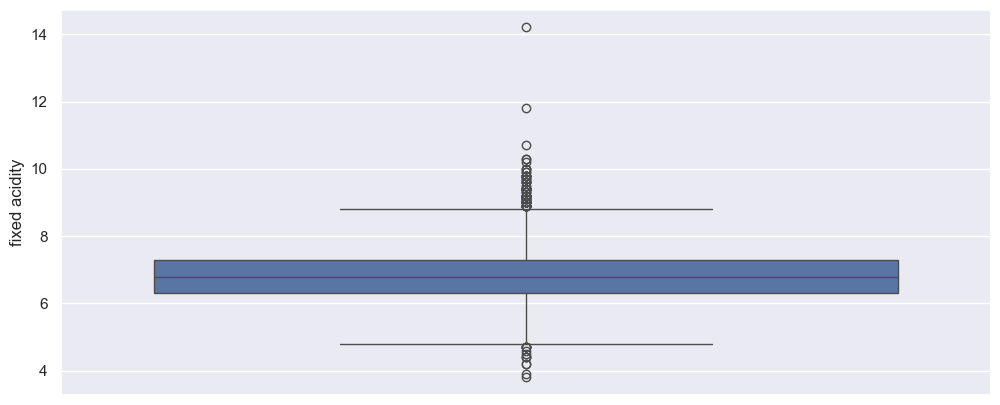

In [220]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['fixed acidity'])
plt.show()

Segundo Site diario da repulblica, [LINK](https://diariodarepublica.pt/dr/detalhe/portaria/610-1972-690063) 
A Acidez miníma é estipulado em 3,8gramas por litro, quanto maior for a Acidez melhor qualidade tem o vinho. com basse nessas informações, não é preciso fazer a remoção de outliers.


Ácido L(+)tartárico (COOH–(CHOH)2
–COOH) é o ácido orgânico mais forte daqueles presentes na uva, por isso é de grande importância no pH, características organolépticos, equilíbrio ácido-base, nuance de cor e índice de maturação. ELE determinado principalmente em mostos e vinhos, pois representa aproximadamente de 50 a 70% da acidez total dependendo da casta e do seu estado de conservação maturidade. Seu conteúdo pode variar entre 2 e 6 g/L dependendo da estação do ano, a região, a uva ou o mosto.

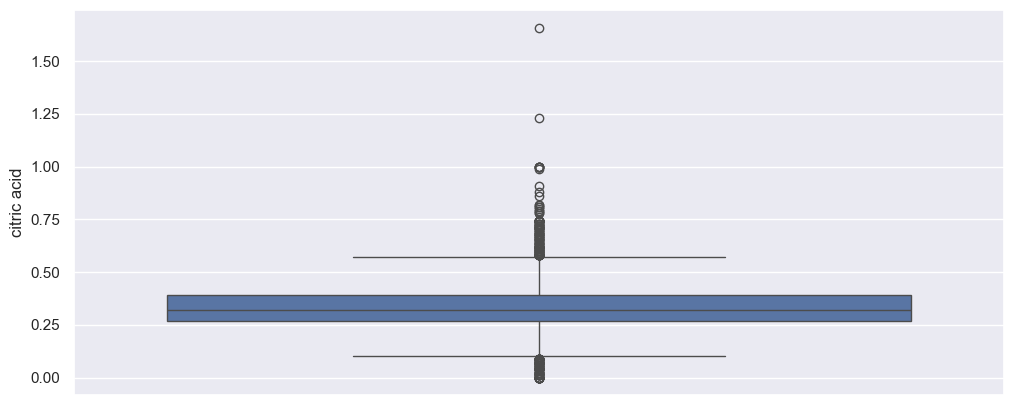

In [221]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['citric acid'])
plt.show()

In [222]:
df_white = df_white.drop(index=df_white[df_white['citric acid'] > 1].index);

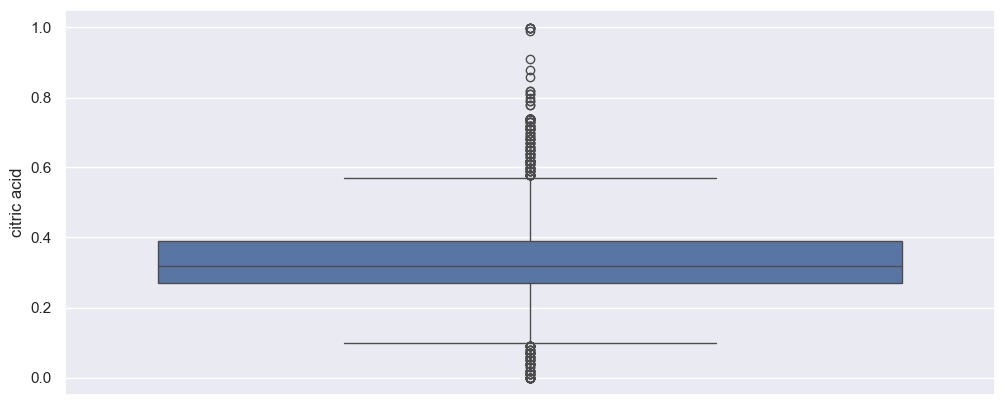

In [223]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['citric acid'])
plt.show()

Segundo site de Portugal, [LINK](https://diariodarepublica.pt/dr/detalhe/portaria/610-1972-690063) referencia em fabricação de vinhos, os valores para acido citrico não deve ultrapassar 1 g/litro.

Fizemos a exclusão dos outliers para melhor classificação dos dados, assim obtemos melhores informações. 

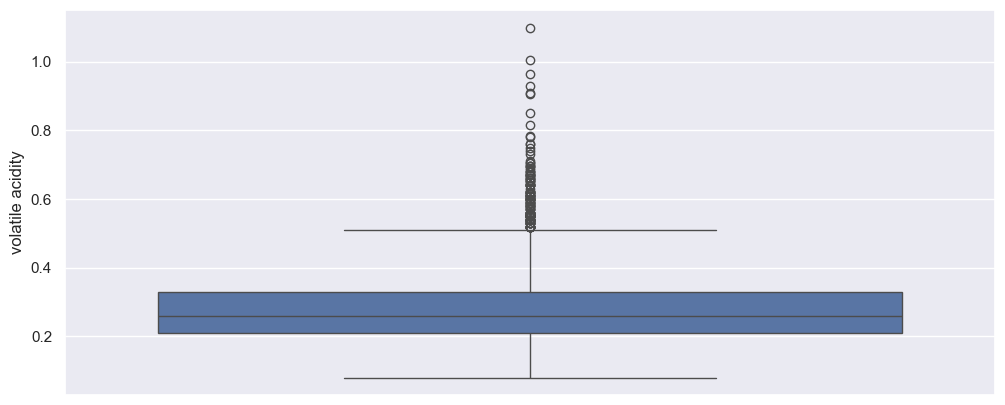

In [224]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['volatile acidity'])
plt.show()

In [225]:
df_white = df_white.drop(index=df_white[df_white['volatile acidity'] > 1.2].index)

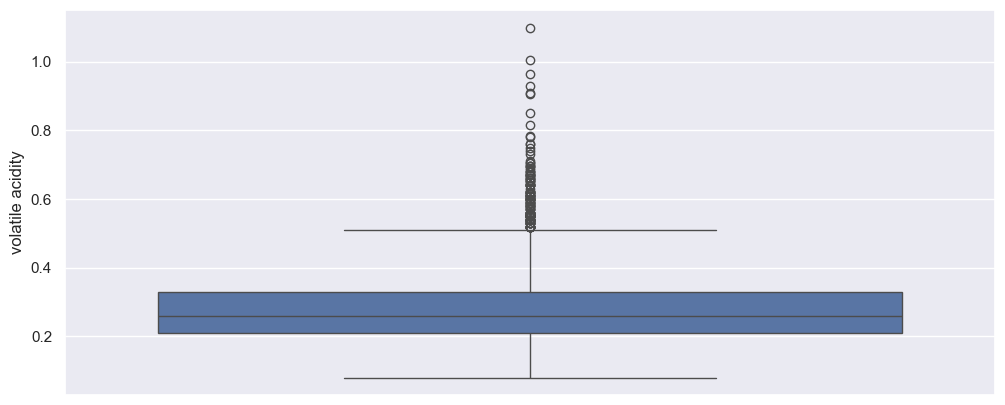

In [226]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['volatile acidity'])
plt.show()

Conforme analisamos as informações no site Portugues (Diario da Repulblica), por seu um País referencia na fabricação de vinhos. [LINK](https://diariodarepublica.pt/dr/detalhe/portaria/610-1972-690063) A Acidez volátil corrigida máxima (expressa em ácido acético) - 1,2 g por litro.

Abaixo mais informações referente à Acidez Volátil.
Usando a definição usada pelo autor Jamie Goode, acidez volátil é relacionada com a formação de ácido acético e compostos relacionados no vinho, por conta da ação de bactérias durante o processo de vinificação. Se você relacionou a expressão ácido acético com vinagre, já está no caminho certo. No fundo, um vinagre de vinho poderia ser descrito de forma simplista como um vinho sem álcool e com elevados níveis de acidez volátil.  

Dois gêneros de bactérias são as principais responsáveis pela formação da acidez volátil: Acetobacter e Gluconobacter.
Todos os vinhos têm algum nível de acidez volátil, a questão principal é saber se ela está acima ou abaixo do nosso nível de percepção. A maioria dos vinhos tem níveis de ácido acético entre 0,3 e 0,5 gramas por litro. Deste patamar, geralmente as leveduras contribuem com 0,1 g/L e as bactérias com 0,2 a 0,4 g/L.[LINK](https://winefun.com.br/acidez-volatil-conheca-um-dos-defeitos-mais-controvertidos-do-mundo-dos-vinhos/)


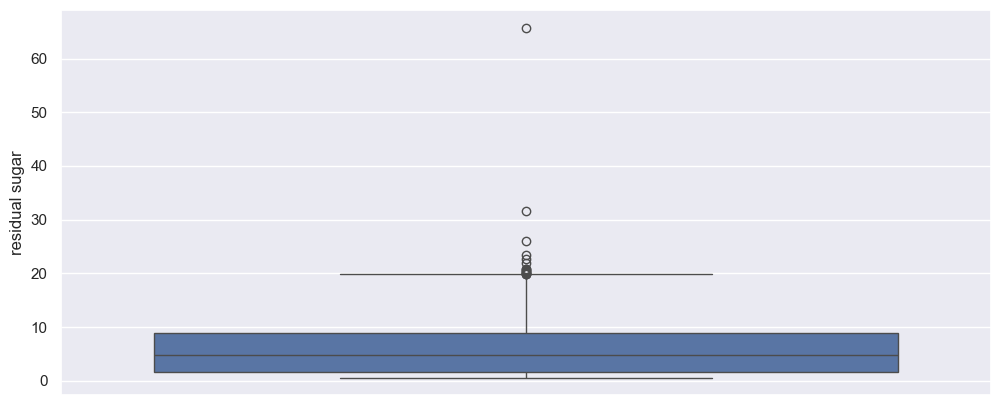

In [227]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['residual sugar'])
plt.show()

In [228]:
df_white = df_white.drop(index=df_white[df_white['residual sugar'] > 19.78].index)

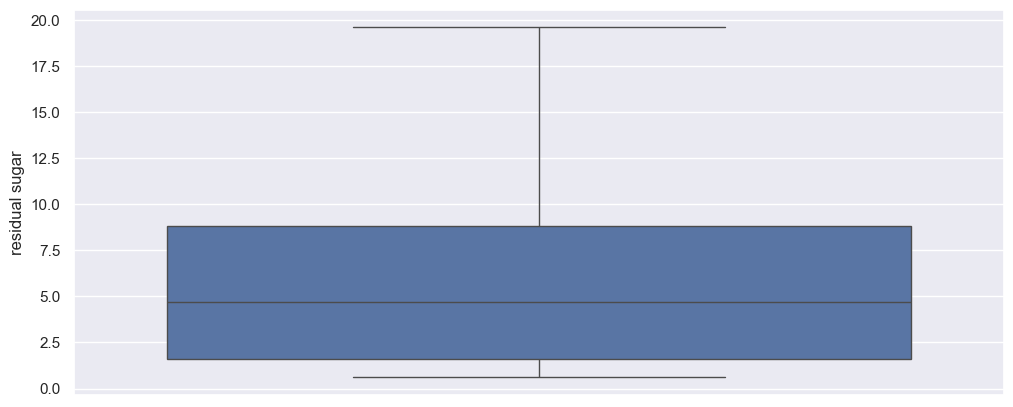

In [229]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['residual sugar'])
plt.show()

#Por default utilizamos a constante para outlier 1.5, porem usarei a constante no valor de 3.0 tratando as variaveis como outlier extremos, (FAVERO, MANUAL DE ANALISE DE DADOS, 53.)

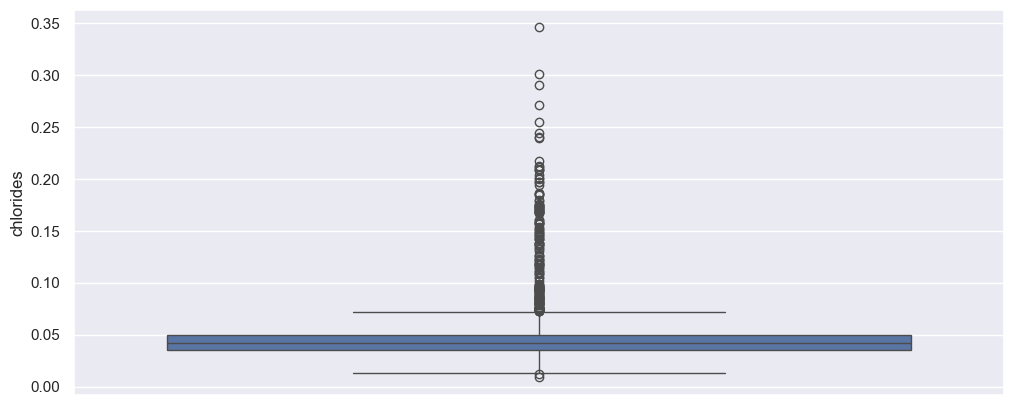

In [230]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['chlorides'])
plt.show()

Cloretos (expressos em cloreto de sódio) - não superiores a 1 g por litro.  [LINK](https://diariodarepublica.pt/dr/detalhe/portaria/610-1972-690063)

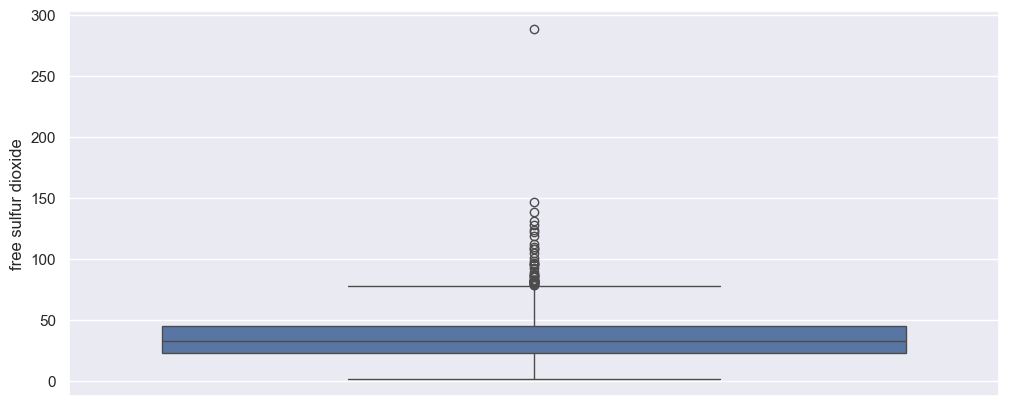

In [231]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['free sulfur dioxide'])
plt.show()

In [232]:
df_white = df_white.drop(index=df_white[df_white['free sulfur dioxide'] > 77].index)

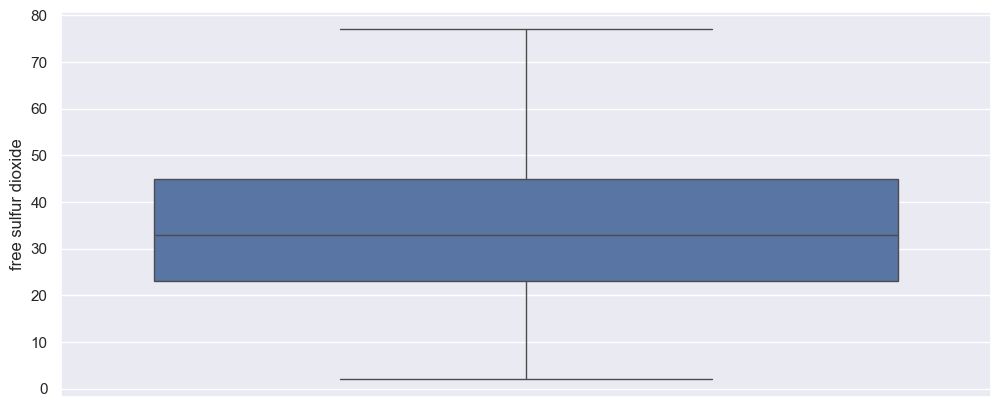

In [233]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['free sulfur dioxide'])
plt.show()

Anidrido sulfuroso livre - não superior a 70 mg por litro, com tolerância de 10 por cento. [LINK](https://diariodarepublica.pt/dr/detalhe/portaria/610-1972-690063)

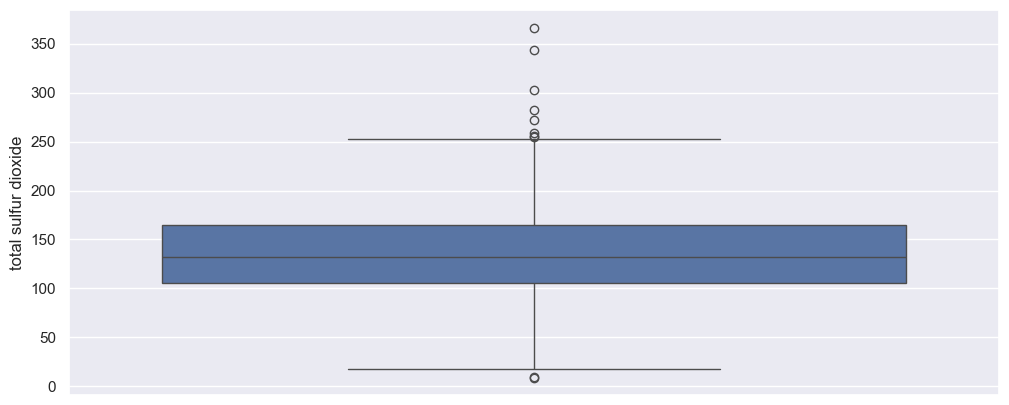

In [234]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['total sulfur dioxide'])
plt.show()

In [235]:
df_white = df_white.drop(index=df_white[df_white['total sulfur dioxide'] > 300].index)

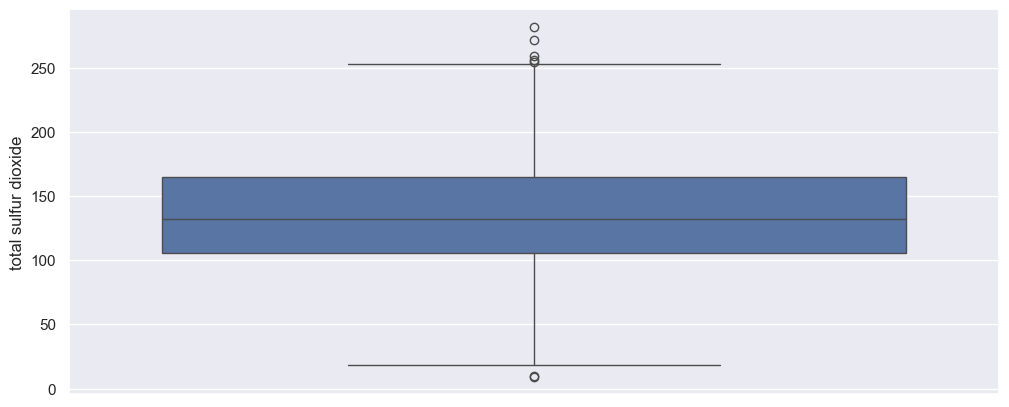

In [236]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['total sulfur dioxide'])
plt.show()

Anidrido sulfuroso total - não superior a 300 mg por litro para os vinhos brancos, [LINK](https://diariodarepublica.pt/dr/detalhe/portaria/610-1972-690063)

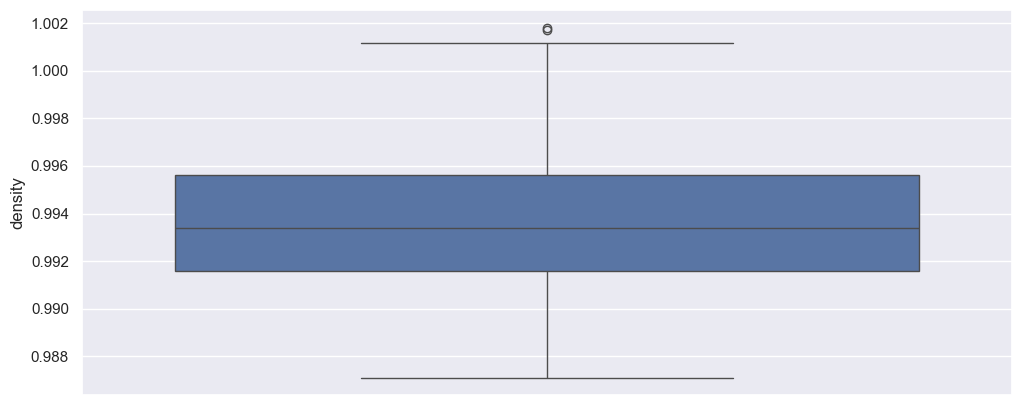

In [237]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['density'])
plt.show()

La densidad relativa a 20 °C se
obtiene multiplicando la masa volúmica por el factor 1,0018. Se expresa con
cuatro decimales y es adimensional.
Los valores habituales de la masa
volúmica a 20 °C para cada tipo de
muestra son:

-Vino blanco seco:
0,9880-0,9930 g/mL.[LINK](https://laboaragon.com/docs/marcas/panreac/Enologia%20Manual%20de%20Tecnicas.pdf)

DIARIO OFICIAL DE LAS COMUNIDADES EUROPEAS.
Reglamento (CEE) N° 2676/90 de la Comisión de 17 de septiembre de 1990 por el que se determinan los métodos de análisis comunitarios aplicables en el sector del vino. 3-14 (1990).

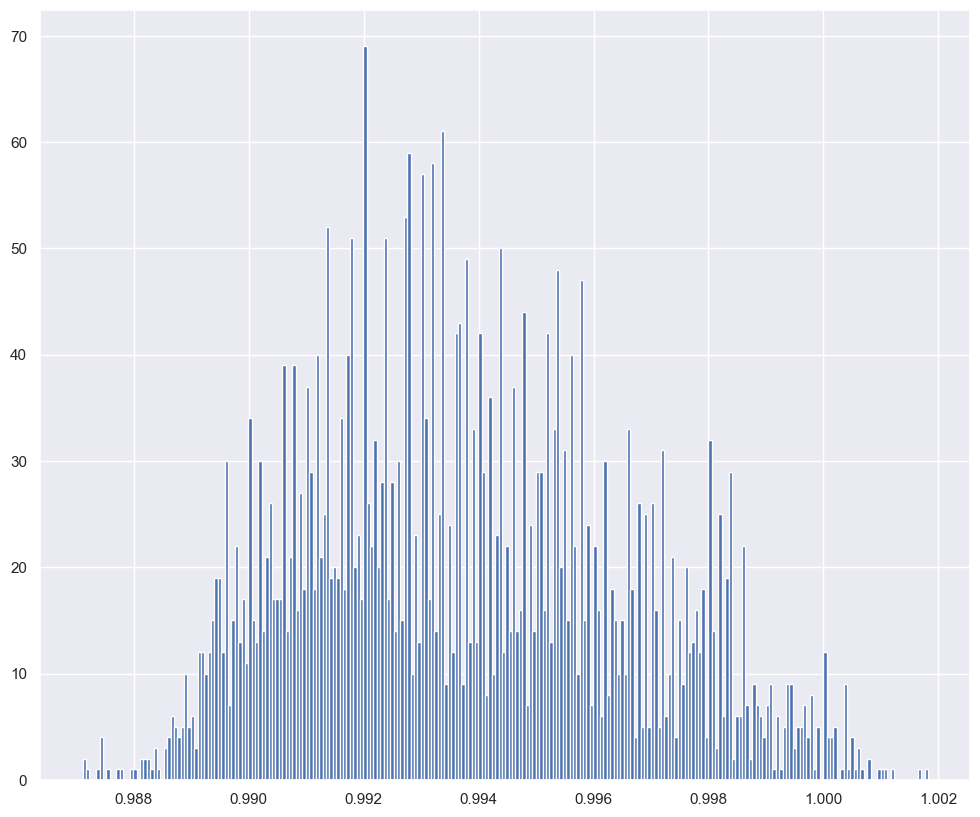

In [238]:
df_white['density'].hist(figsize=(12,10),bins=250);

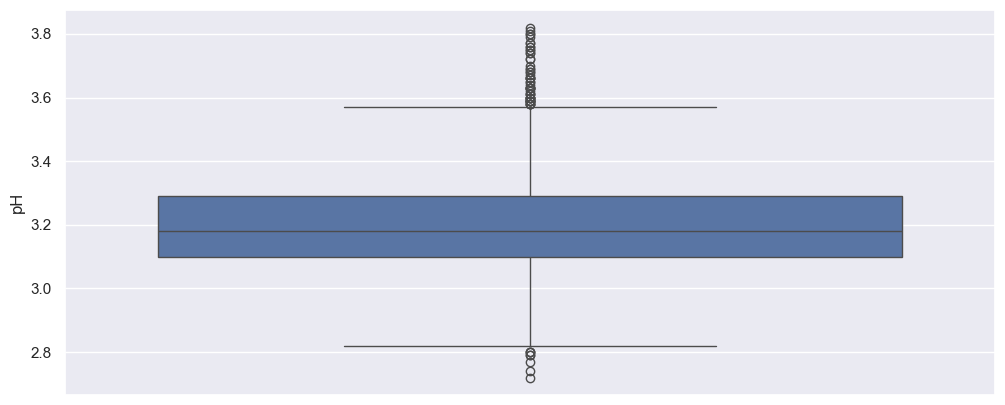

In [239]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['pH'])
plt.show()

In [240]:
df_white = df_white.drop(index=df_white[df_white['pH'] > 3.6].index)

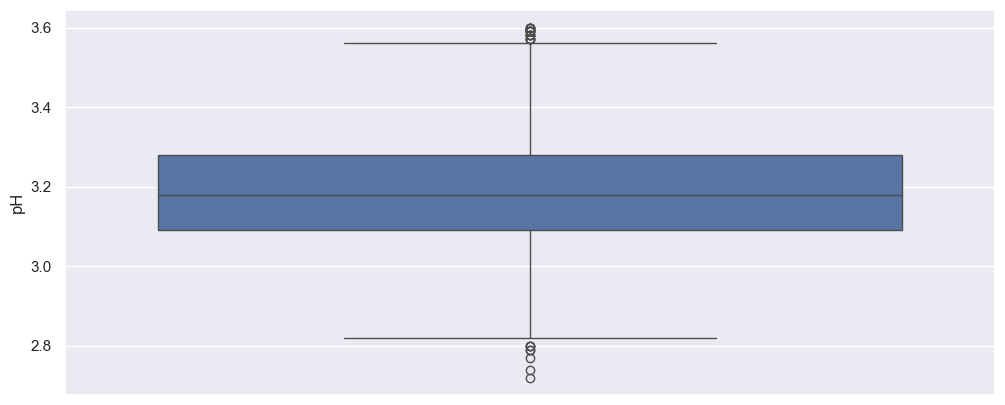

In [241]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['pH'])
plt.show()

O pH corresponde à concentração de hidrogênio iônico proveniente dos ácidos orgânicos, além da concentração de potássio, representando a acidez real do vinho (GABAS et al., 1994; RIZZON & MIELE, 2002).

Em condições normais, o pH sofre um aumento numérico durante as diversas etapas de elaboração do vinho. Esse aumento está relacionado com a diminuição dos teores de ácido tartárico em função da precipitação de tartarato ácido de potássio e de tartarato de cálcio, provocado pelo álcool e pela ação física do frio (MANFROI et al.,
2006). Entretanto, principalmente no caso dos vinhos tintos, também é notória uma pequena redução do pH após a conclusão da fermentação malolática.

A avaliação desse parâmetro é importante pelo seu efeito na cor, no sabor e na proporção entre SO2  livre e combinado. Para que o vinho atinja níveis satisfatórios destas características, o pH deve ficar entre 3,1 e 3,6 (AMERINE & OUGH, 1976)[LINK](https://laboaragon.com/docs/marcas/panreac/Enologia%20Manual%20de%20Tecnicas.pdf).

Estes valores são considerados adequados, tendo em vista que os brancos devem possuir um pH mais baixo para preservar o seu frescor característico e favorecer a preservação dos aromas.

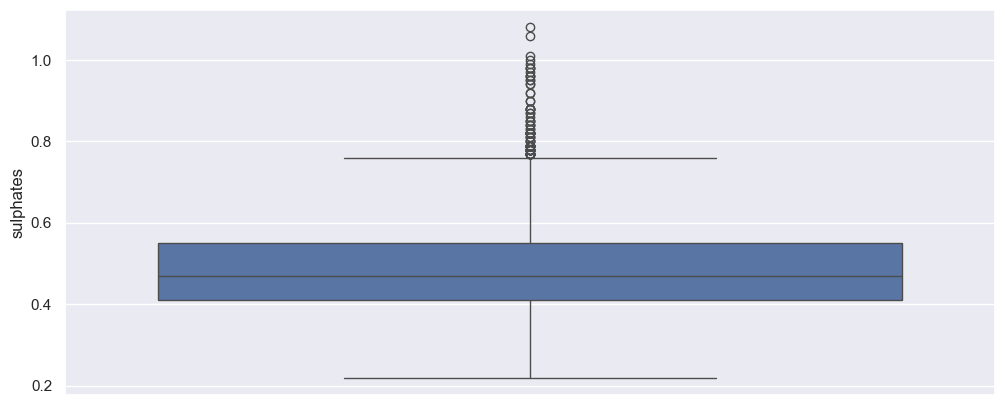

In [242]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['sulphates'])
plt.show()

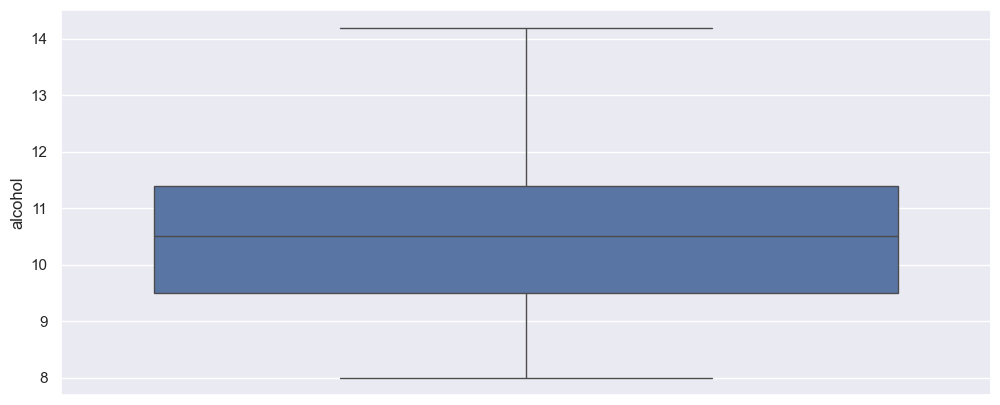

In [243]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white['alcohol'])
plt.show()

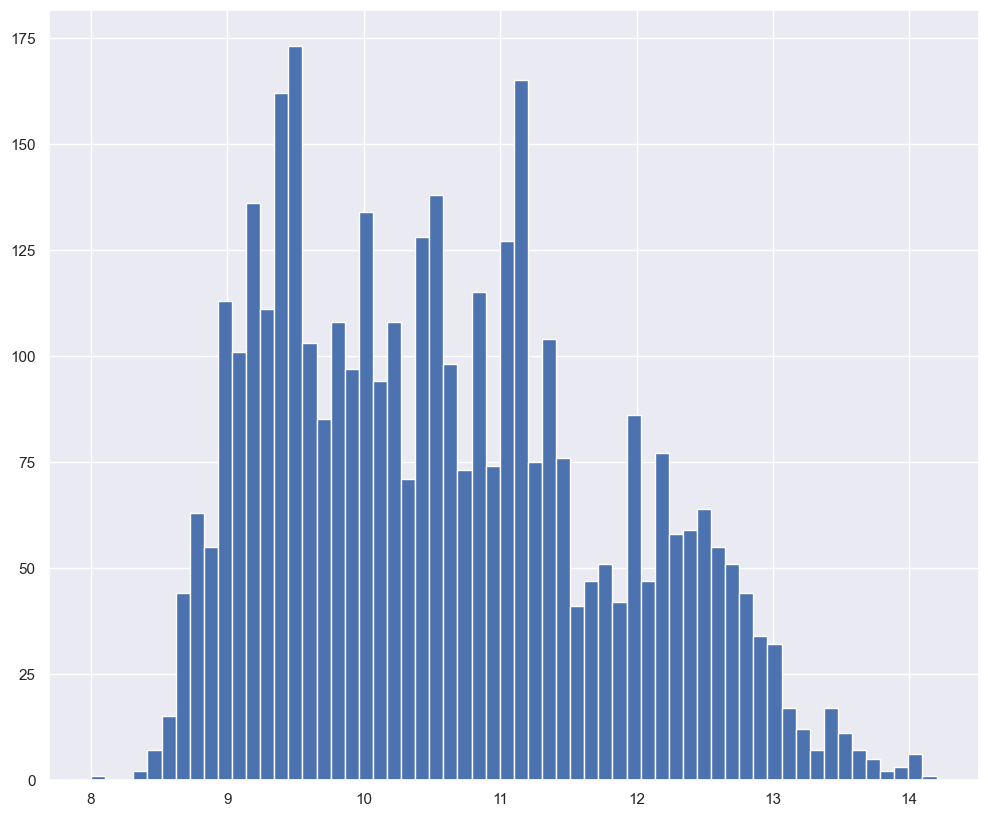

In [244]:
df_white['alcohol'].hist(figsize=(12,10),bins=60);

In [245]:
df_white.shape

(3832, 12)

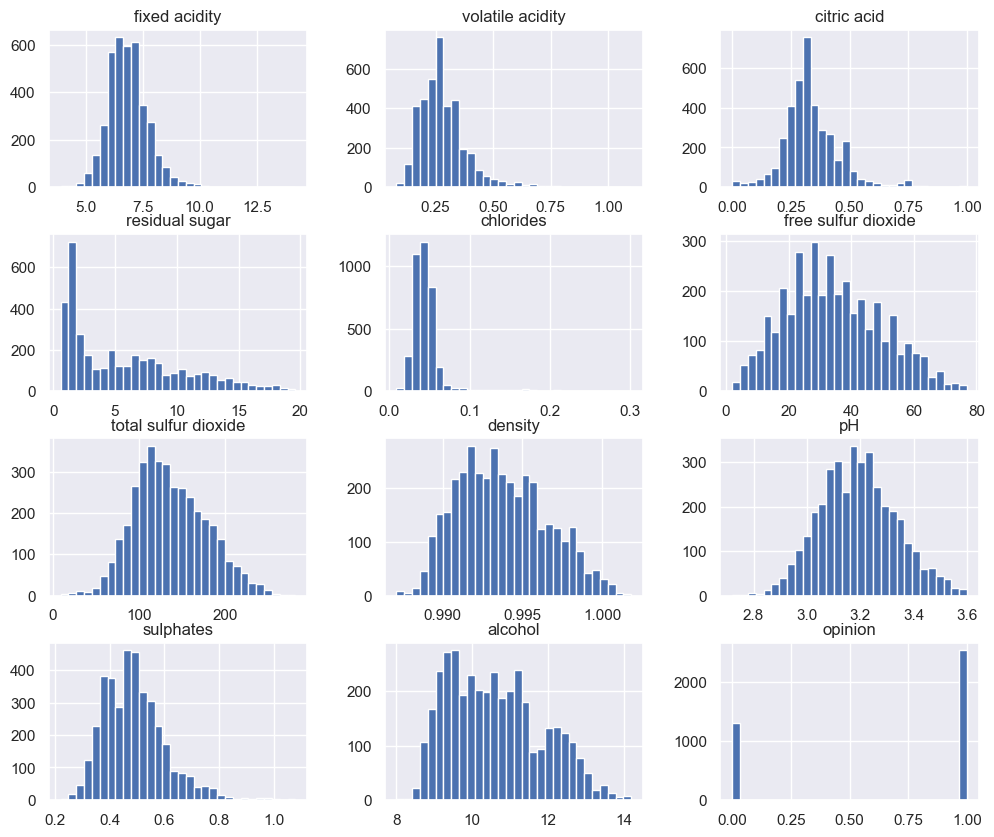

In [246]:
df_white.hist(figsize=(12,10),bins=30);

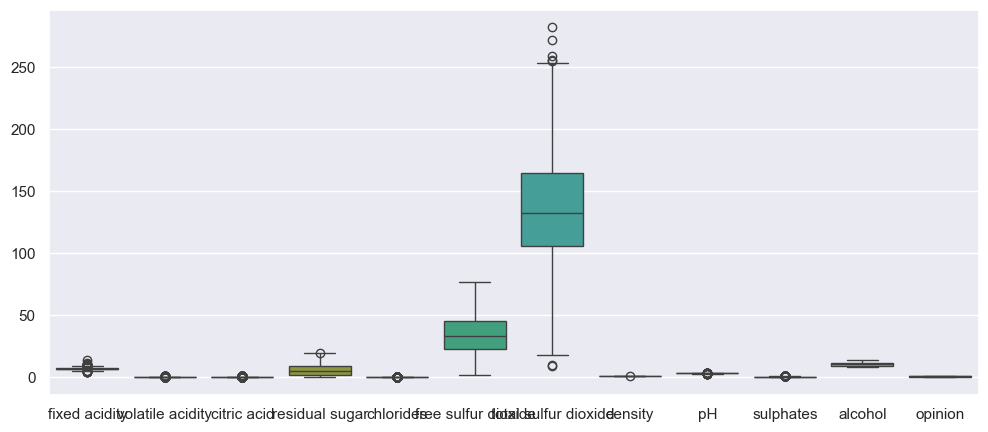

In [247]:
plt.figure(figsize=(12,5))
sns.boxplot(df_white)
plt.show()

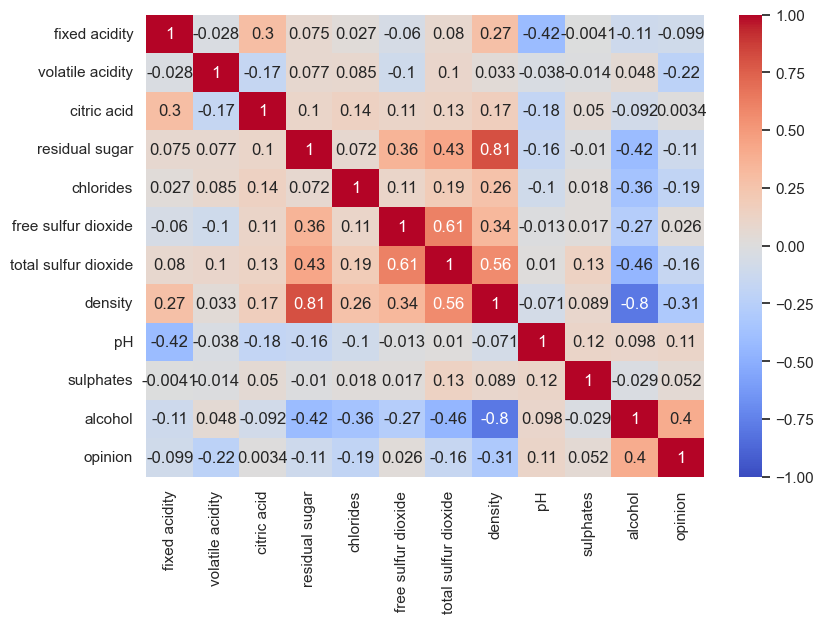

In [248]:
plt.figure(figsize=(9,6))
sns.heatmap(df_white.corr(),annot=True,cmap='coolwarm', vmin= -1, vmax= 1) 
plt.show()

explicar a corelação das variaveis com a sensidade. 

#### 3 - Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

*Dicionário de Dados*
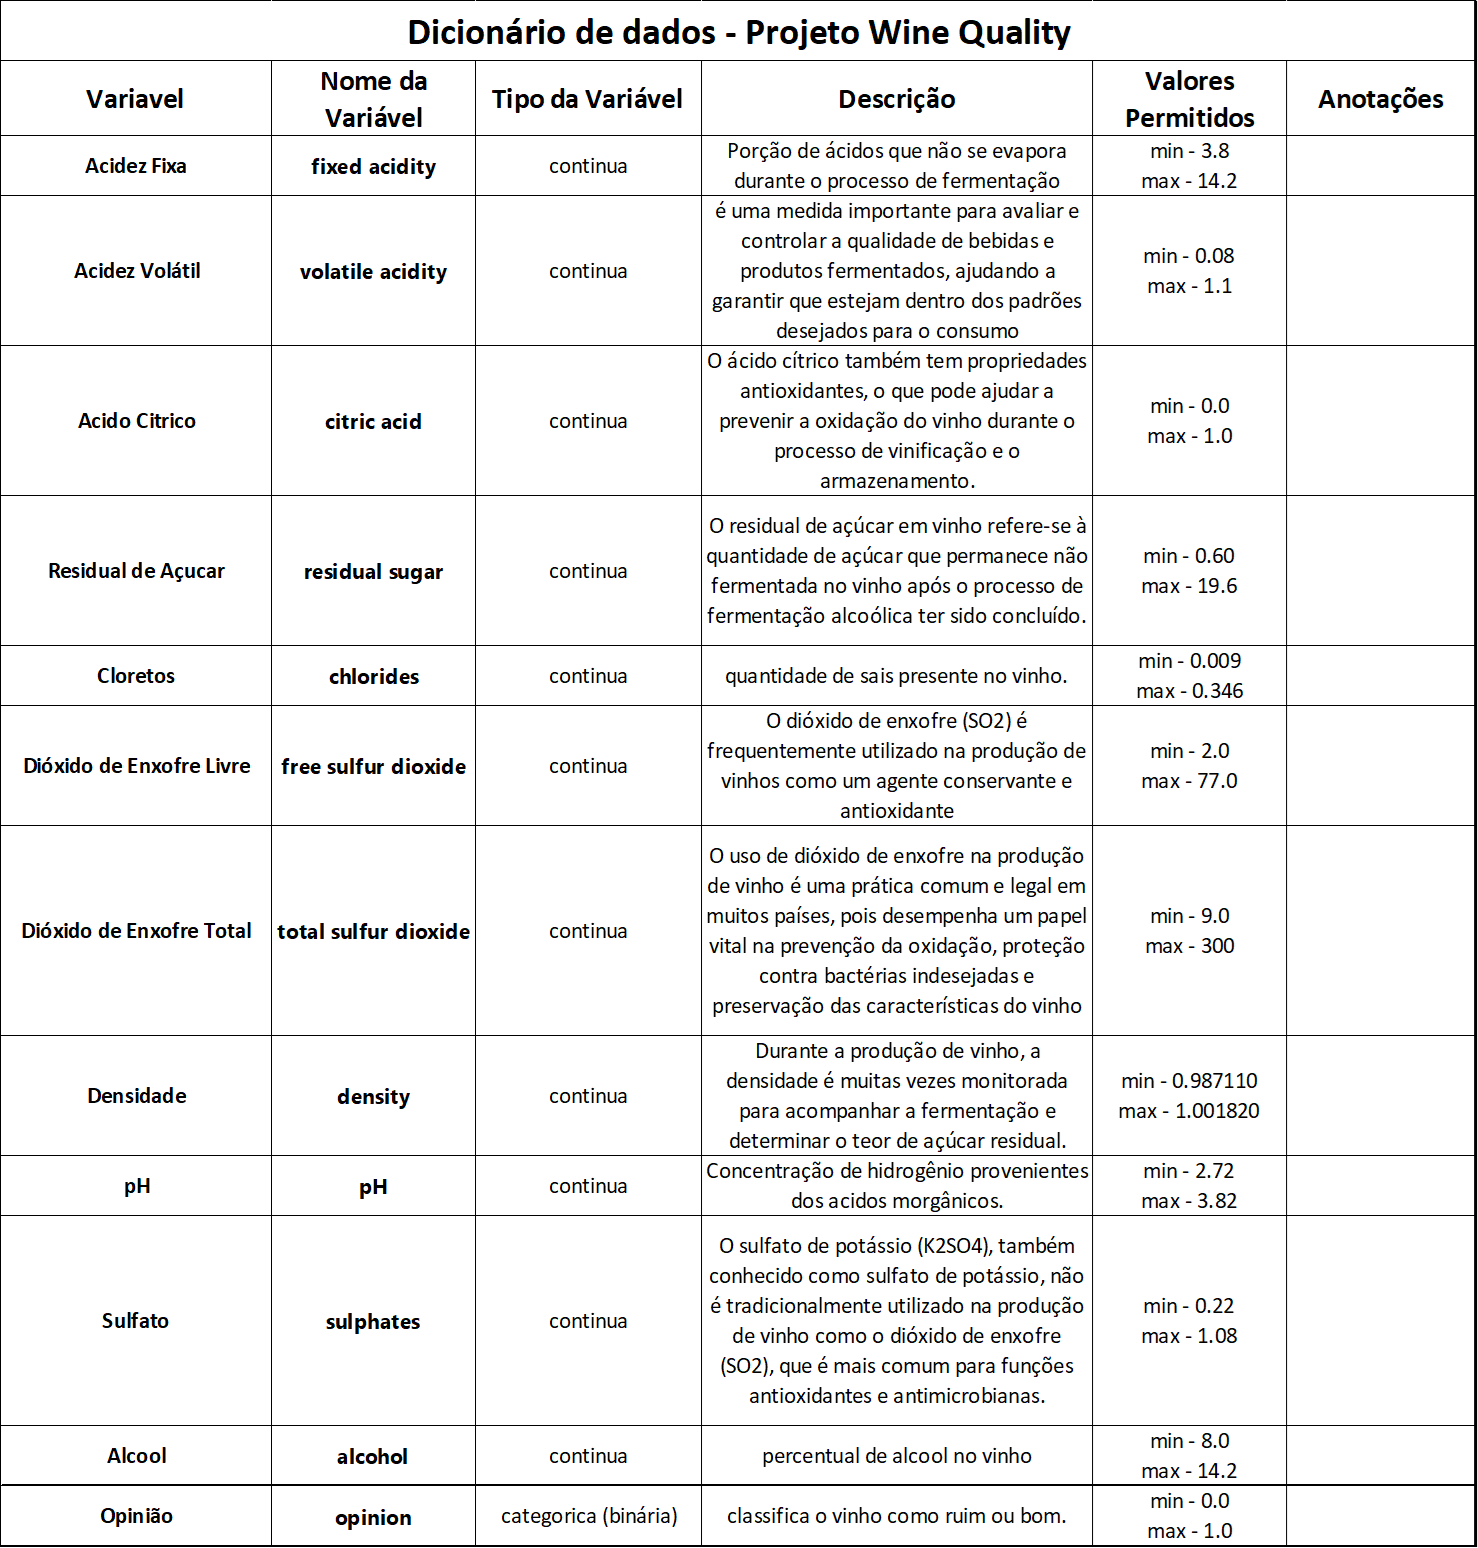

In [249]:
# análise descritiva - estatísticas básicas
df_white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3832.000000       3832.000000  3832.000000     3832.000000   
mean        6.849883          0.280947     0.334293        5.834695   
std         0.860674          0.102889     0.119072        4.654742   
min         3.900000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.762500   
max        14.200000          1.100000     1.000000       19.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3832.000000          3832.000000           3832.000000  3832.000000   
mean      0.045765            34.084290            136.034708     0.993726   
std       0.022804            15.363054             41.893195     0.002784   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991590   
50%       0.042000            33.000000            132.000000     0.993400   
75%       0.050000            45.000000            165.000000     0.995642   
max       0.301000            77.000000            282.000000     1.001820   

                pH    sulphates      alcohol      opinion  
count  3832.000000  3832.000000  3832.000000  3832.000000  
mean      3.190932     0.488672    10.601813     0.661795  
std       0.143529     0.112445     1.221513     0.473160  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.090000     0.410000     9.500000     0.000000  
50%       3.180000     0.470000    10.500000     1.000000  
75%       3.280000     0.550000    11.400000     1.000000  
max       3.600000     1.080000    14.200000     1.000000

In [250]:
df_white['opinion'].value_counts(normalize=True)

opinion
1    0.661795
0    0.338205
Name: proportion, dtype: float64

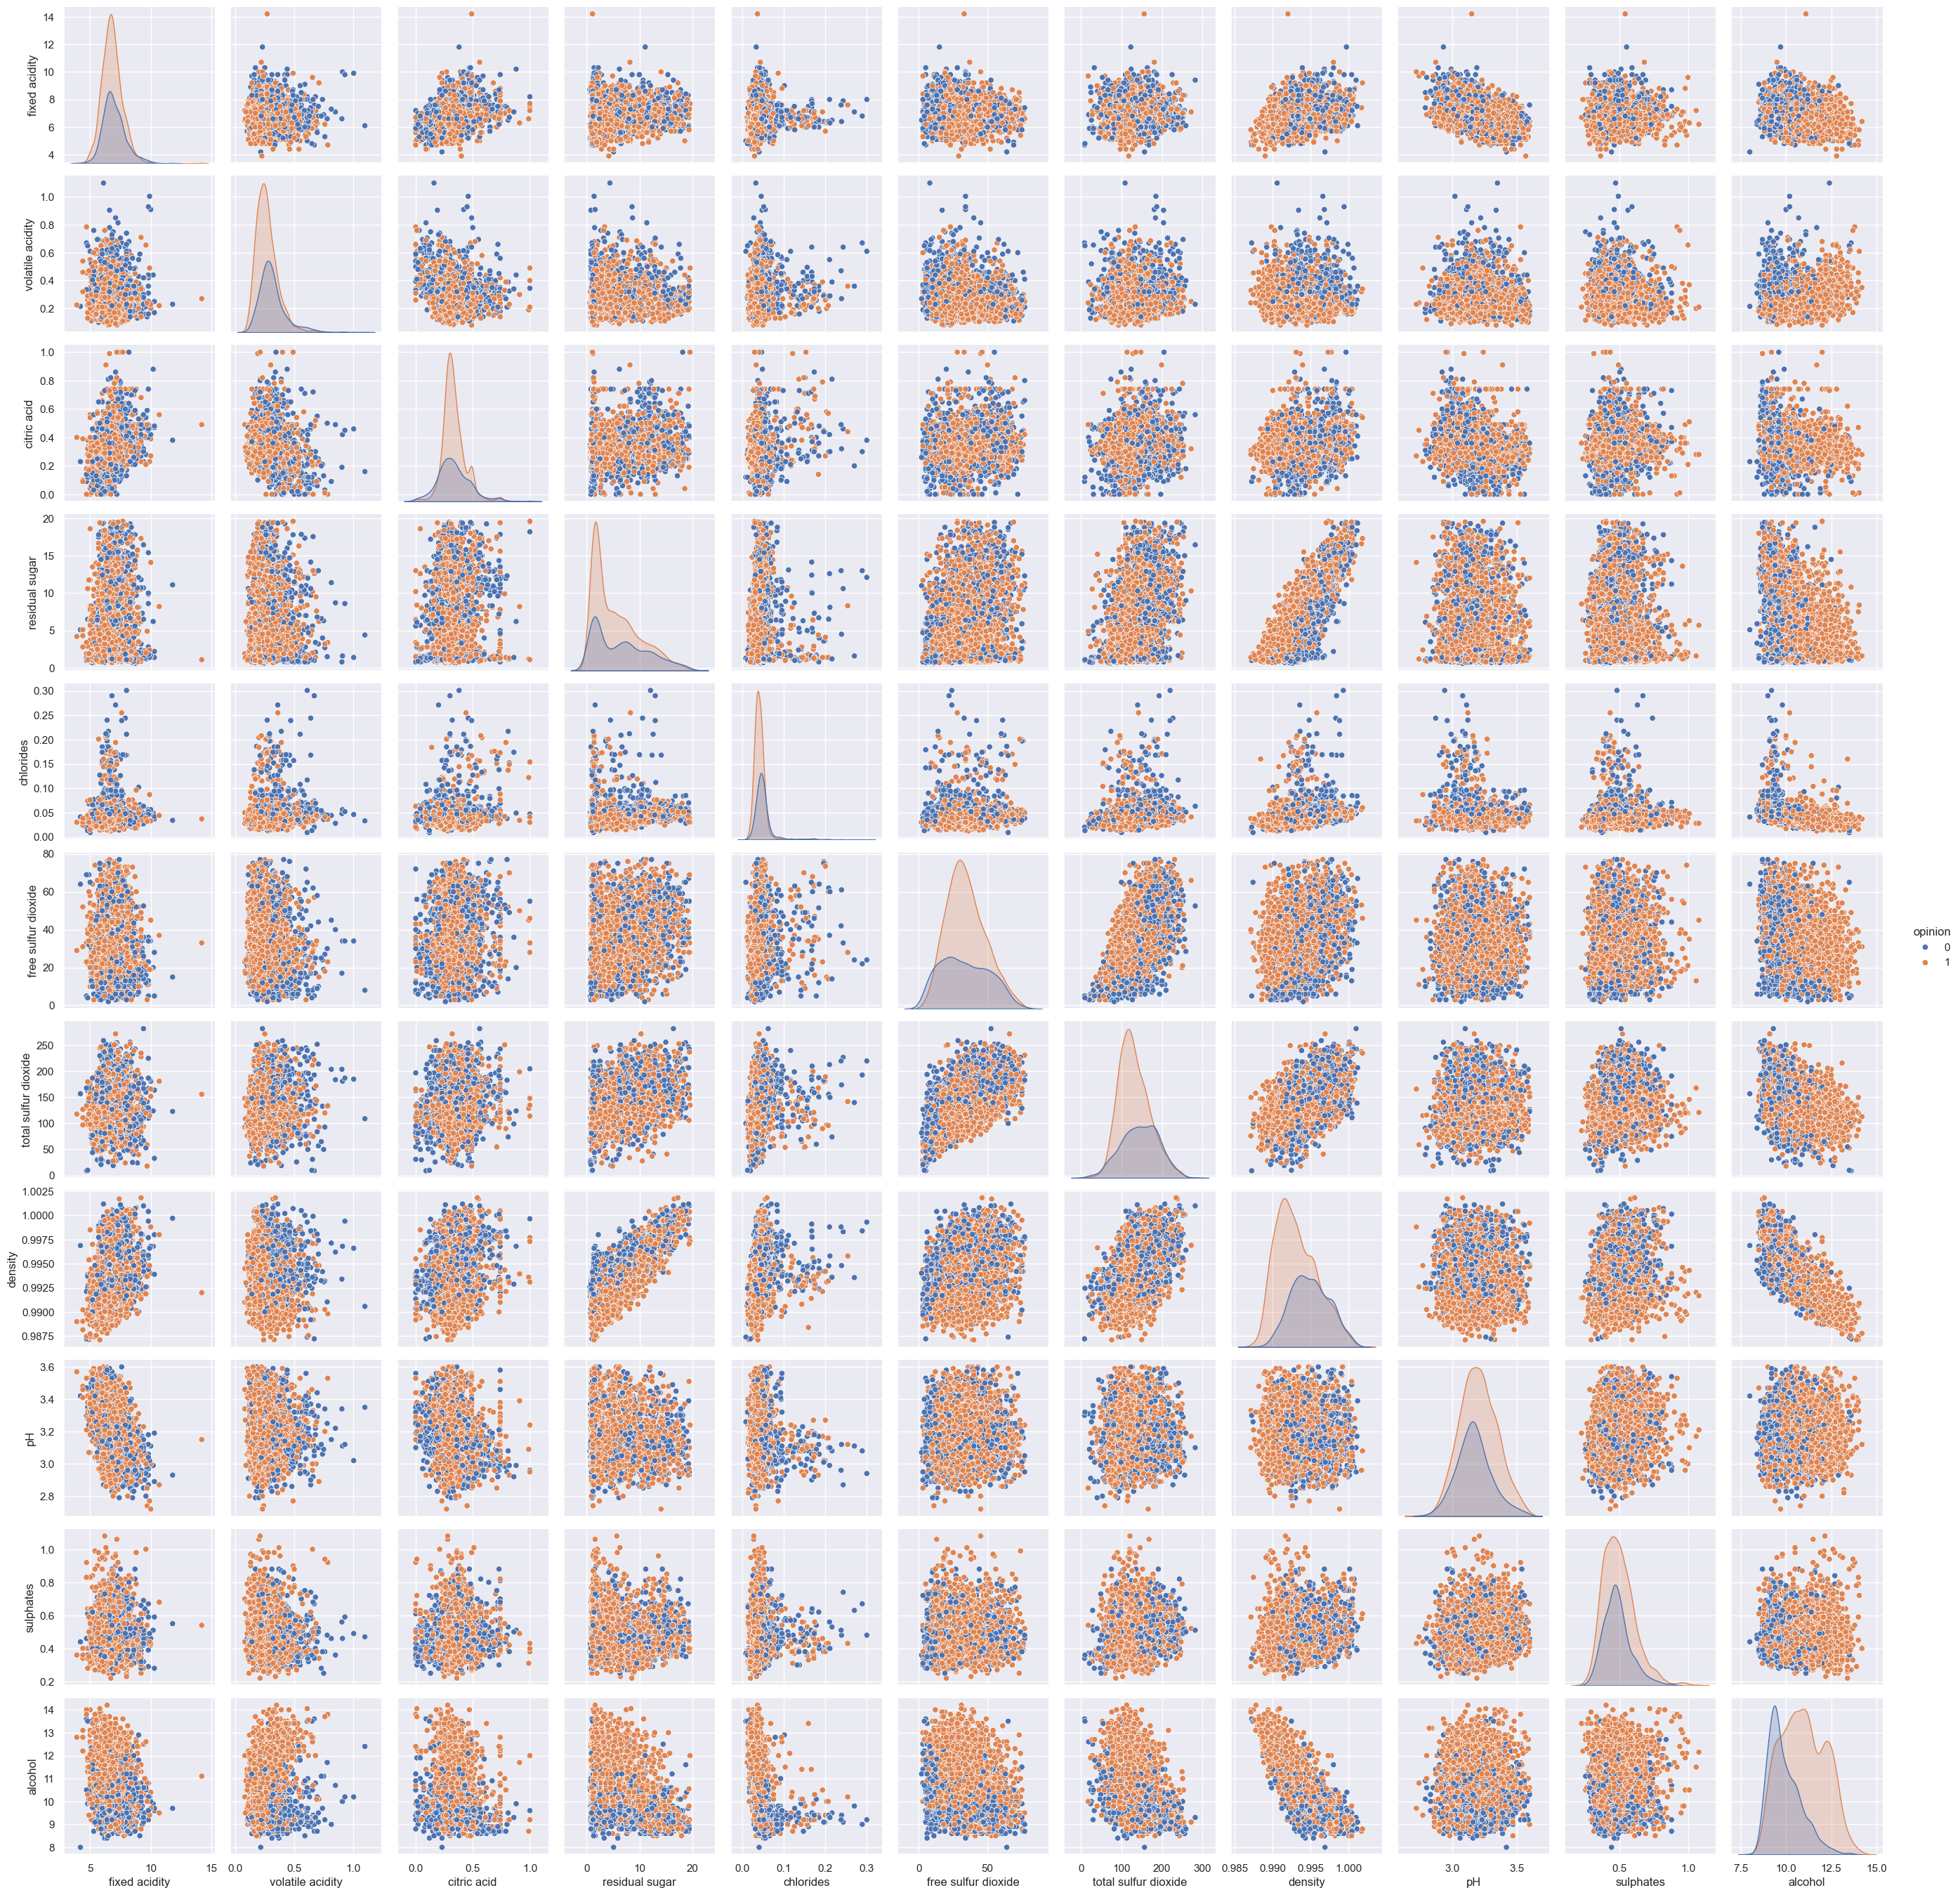

In [251]:
# analisando correlações
sns.pairplot(df_white, hue='opinion')
plt.show()

STD - No código acima encontramos os std para cada variavel. 

4 - Com a base escolhida:

    a - Descreva as etapas necessárias para criar um modelo de classificação eficiente. 
    etapas do crisp dm https://www.google.com/amp/s/www.escoladnc.com.br/blog/data-science/metodologia-crisp-dm
    


b - b - Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

**Pré-Processamento de dados**

In [252]:
df_white['opinion']

1       1
2       1
3       1
4       1
5       1
       ..
3937    1
3938    1
3939    0
3940    1
3941    1
Name: opinion, Length: 3832, dtype: int32

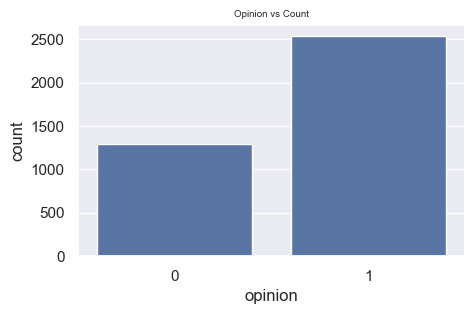

In [253]:
#analisando balaceamento dos dados. 
plt.figure(figsize=(5,3))
sns.set(font_scale=1)
plt.title("Opinion vs Count",fontsize=7)
sns.countplot(x=(df_white['opinion']));

In [254]:
#Separando x e y.
x = df_white.drop(columns='opinion')
y = df_white['opinion']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

A partir daqui devo criar o PIPELINE

In [255]:
# Pipelines
 
logreg = Pipeline([('scaler', MinMaxScaler()),('model', LogisticRegression(solver='saga'))])
 
dt = Pipeline([('scaler', MinMaxScaler()),('model', DecisionTreeClassifier(random_state=10))])
 
svm = Pipeline([('scaler', MinMaxScaler()),('model', SVC(probability=True,random_state=10))])

In [256]:
# Ajuste do pipeline - regressão logística
 
logreg.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', LogisticRegression(solver='saga'))])

In [257]:
# Ajuste do pipeline - árvore de decisão
 
dt.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier(random_state=10))])

In [258]:
# Ajuste do pipeline - svm
 
svm.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', SVC(probability=True, random_state=10))])

In [259]:
# Amostrador de k-folhas
 
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
 


In [260]:
# Parâmetros de busca
params_logreg = {
    'model__penalty': ['l1', 'l2', None],
    'model__C': np.random.uniform(0.01, 10, 100),
}

params_dt = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': range(2, 11)
}

params_svc = {
    'model__kernel': ['rbf', 'sigmoid', 'cosine', 'linear'],
    'model__C': np.random.uniform(0.01, 10, 100),
    'model__gamma': np.random.uniform(0.01, 10, 100)
}

In [261]:
# Buscador de hiperparâmetros
random_search_logreg = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=params_logreg,
    n_iter=10,
    scoring='f1_weighted',
    cv=cv,
    refit=True,
    error_score=0
)

random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=params_dt,
    n_iter=10,
    scoring='f1_weighted',
    cv=cv,
    refit=True,
    error_score=0
)

random_search_svc = RandomizedSearchCV(
    estimator=svm,
    param_distributions=params_svc, n_iter=10,
    scoring='f1_weighted',
    cv=cv,
    refit=True,
    error_score=0
)

validação cruzada, fatiando em 10 vezes e analizando cada uma. numeros de fold.

In [262]:
# Ajuste do modelo de regressão logística
random_search_logreg.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('model',
                                              LogisticRegression(solver='saga'))]),
                   param_distributions={'model__C': array([1.76481977, 5.39480258, 7.77217791, 0.15989251, 3.55043918,
       6.73417663, 1.46799681, 4.73431047, 2.2031796 , 8.72722265,
       6.70371712...
       9.27746366, 5.76627515, 5.2081008 , 0.70222602, 1.49742538,
       3.2595916 , 9.76163502, 2.15115636, 5.46998404, 0.57362285,
       4.70134528, 3.55656219, 3.33785147, 9.45093035, 5.07471952,
       4.85209097, 5.5439563 , 6.24280352, 0.83476135, 4.84964861,
       4.31720607, 7.61202422, 7.82757715, 2.43965337, 0.29234889,
       0.76850088, 2.79260803, 6.90314703, 5.84587963, 6.39236194]),
                                        'model__penalty': ['l1', 'l2', None]},
                   scoring='f1_weighted')

In [263]:
# Ajuste do modelo de árvore de decisão
random_search_dt.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('model',
                                              DecisionTreeClassifier(random_state=10))]),
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': range(2, 11)},
                   scoring='f1_weighted')

In [264]:
# Ajuste do modelo de svm
 
random_search_svc.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('model',
                                              SVC(probability=True,
                                                  random_state=10))]),
                   param_distributions={'model__C': array([0.87000952, 7.9065062 , 3.23484052, 9.48410448, 6.879027  ,
       0.59596575, 4.4671846 , 2.38133606, 0.49267999, 0.4128338 ,
       6.54830873...
       5.70316852, 6.42023643, 4.3189209 , 2.39851414, 1.43432711,
       5.08730241, 1.45531904, 1.65538804, 2.42713222, 3.91580533,
       3.31557713, 4.47253298, 7.48154261, 5.76759202, 5.74041285,
       6.89359609, 1.951532  , 9.29589541, 4.84493329, 1.87316001,
       3.69479369, 4.5566899 , 4.27372905, 9.14124588, 8.82184464,
       3.45930261, 4.45987452, 5.42412135, 6.37570775, 3.06633418]),
                                        'model__kernel': ['rbf', 'sigmoid',
                                                          'cosine', 'linear']},
                   scoring='f1_weighted')

In [265]:
# Melhores parâmetros
print('Regressão Logística:', random_search_logreg.best_params_)
print('Árvore de Decisão:', random_search_dt.best_params_)
print('SVM:', random_search_svc.best_params_)


Regressão Logística: {'model__penalty': 'l2', 'model__C': 8.727222648716506}
Árvore de Decisão: {'model__max_depth': 7, 'model__criterion': 'gini'}
SVM: {'model__kernel': 'rbf', 'model__gamma': 8.821963875392576, 'model__C': 2.9179709651916355}


In [266]:
# Desempenho final - regressão logística
# Novas previsões
ypred_white_train_logreg = random_search_logreg.best_estimator_.predict(x_train)
ypred_white_test_logreg = random_search_logreg.best_estimator_.predict(x_test)

# Análise do desempenho
print('Desempenho - Base de Treino - Regressão Logística')
print(classification_report(y_train, ypred_white_train_logreg))

print('Desempenho - Base de Teste - Regressão Logística')
print(classification_report(y_test, ypred_white_test_logreg))

Desempenho - Base de Treino - Regressão Logística
              precision    recall  f1-score   support

           0       0.67      0.55      0.61      1037
           1       0.79      0.86      0.82      2028

    accuracy                           0.76      3065
   macro avg       0.73      0.71      0.72      3065
weighted avg       0.75      0.76      0.75      3065

Desempenho - Base de Teste - Regressão Logística
              precision    recall  f1-score   support

           0       0.64      0.50      0.56       259
           1       0.77      0.85      0.81       508

    accuracy                           0.74       767
   macro avg       0.70      0.68      0.69       767
weighted avg       0.73      0.74      0.73       767



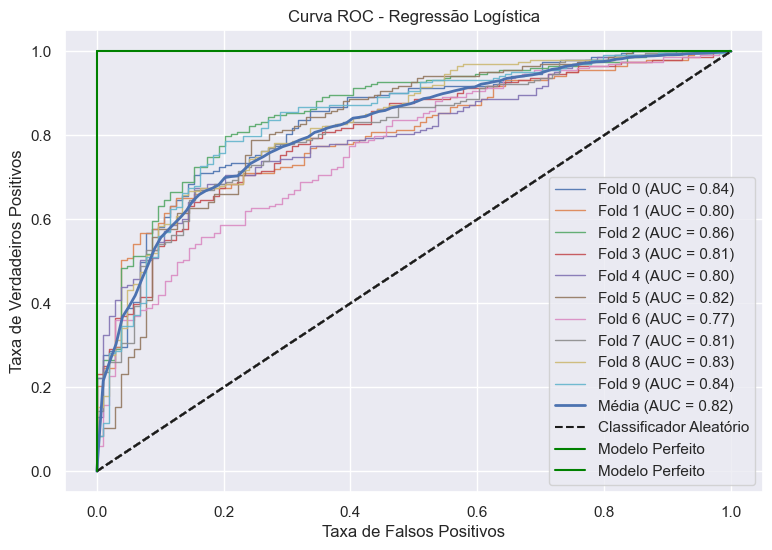

In [267]:
# Curva ROC - Regressão logística
plt.figure(figsize=(9, 6))

tpr_list = []

for fold, (train_index, test_index) in enumerate(cv.split(x_train, y_train)):
    x_fold_train, x_fold_test = x_train.iloc[train_index], x_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    y_proba_logreg = random_search_logreg.predict_proba(x_fold_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_fold_test, y_proba_logreg)
    roc_auc = auc(fpr, tpr)
    # Curva ROC para cada fold
    plt.plot(fpr, tpr, lw=1, alpha=0.9, label=f'Fold {fold} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Interpolação
    fprs = np.linspace(0, 1, 100)
    tprs = np.interp(fprs, fpr, tpr)
    tprs[0] = 0
    tpr_list.append(tprs)
    # Curva ROC média
mean_tpr = np.mean(tpr_list, axis=0)
mean_auc = auc(fprs, mean_tpr)

plt.plot(fprs, mean_tpr, color='b', label=f'Média (AUC = {mean_auc:.2f})', lw=2)

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Regressão Logística')
plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')
plt.plot([0, 0], [0, 1],  label='Modelo Perfeito',color='green')
plt.plot([0, 1], [1, 1], label='Modelo Perfeito',color='green')
plt.legend(loc='lower right')
plt.show()

In [268]:
# Desempenho final - árvore de decisão
# Novas previsões
ypred_white_train_dt = random_search_dt.best_estimator_.predict(x_train)
ypred_white_test_dt = random_search_dt.best_estimator_.predict(x_test)

# Análise do desempenho
print('Desempenho - Base de Treino - Árvore de Decisão')
print(classification_report(y_train, ypred_white_train_dt))

print('Desempenho - Base de Teste - Árvore de Decisão')
print(classification_report(y_test, ypred_white_test_dt))

Desempenho - Base de Treino - Árvore de Decisão
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1037
           1       0.88      0.86      0.87      2028

    accuracy                           0.83      3065
   macro avg       0.80      0.81      0.81      3065
weighted avg       0.83      0.83      0.83      3065

Desempenho - Base de Teste - Árvore de Decisão
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       259
           1       0.79      0.76      0.78       508

    accuracy                           0.71       767
   macro avg       0.68      0.68      0.68       767
weighted avg       0.71      0.71      0.71       767



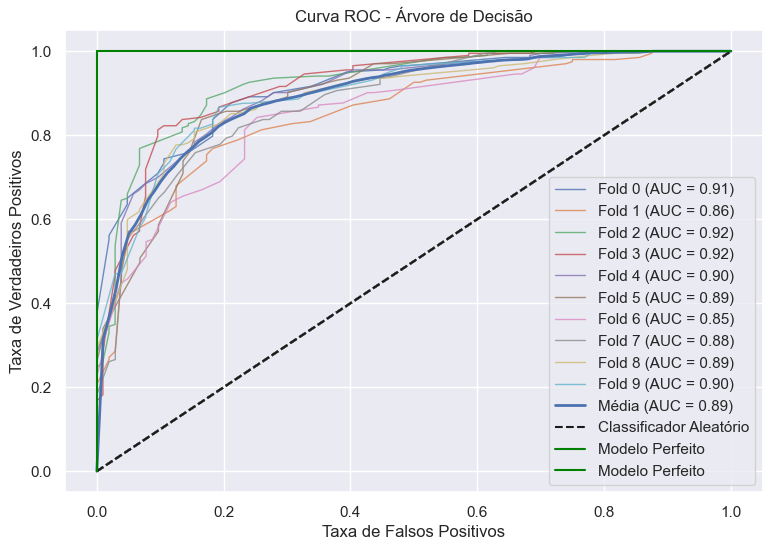

In [269]:
# Curva ROC - Árvore de decisão
plt.figure(figsize=(9, 6))

tpr_list = []

for fold, (train_index, test_index) in enumerate(cv.split(x_train, y_train)):
    x_fold_train, x_fold_test = x_train.iloc[train_index], x_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    y_proba_dt = random_search_dt.predict_proba(x_fold_test)[:,1]
    
    fpr, tpr, _ = roc_curve(y_fold_test, y_proba_dt)
    roc_auc = auc(fpr, tpr)

    # Curva ROC para cada fold
    plt.plot(fpr, tpr, lw=1, alpha=0.8, label=f'Fold {fold} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Interpolação
    fprs = np.linspace(0, 1, 100)
    tprs = np.interp(fprs, fpr, tpr)
    tprs[0] = 0
    tpr_list.append(tprs)

    mean_tpr = np.mean(tpr_list, axis=0)
mean_auc = auc(fprs, mean_tpr)

# Curva ROC média 
plt.plot(fprs, mean_tpr, color='b', label=f'Média (AUC = {mean_auc:.2f})', lw=2)

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Árvore de Decisão')
plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')
plt.plot([0, 0], [0, 1],  label='Modelo Perfeito',color='green')
plt.plot([0, 1], [1, 1], label='Modelo Perfeito',color='green')
plt.legend(loc='lower right')
plt.show()

In [270]:
# Desempenho final - SVM
# Novas previsões
ypred_white_train_svm = random_search_svc.best_estimator_.predict(x_train)
ypred_white_test_svm = random_search_svc.best_estimator_.predict(x_test)

# Análise do desempenho
print('Desempenho - Base de Treino - SVM')
print(classification_report(y_train, ypred_white_train_svm))

print('Desempenho - Base de Teste - SVM')
print(classification_report(y_test, ypred_white_test_svm))

Desempenho - Base de Treino - SVM
              precision    recall  f1-score   support

           0       0.86      0.78      0.81      1037
           1       0.89      0.93      0.91      2028

    accuracy                           0.88      3065
   macro avg       0.87      0.85      0.86      3065
weighted avg       0.88      0.88      0.88      3065

Desempenho - Base de Teste - SVM
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       259
           1       0.80      0.86      0.83       508

    accuracy                           0.77       767
   macro avg       0.74      0.72      0.73       767
weighted avg       0.76      0.77      0.76       767



In [271]:
# SVM
acc_list_train = []
preci_list_train = []
recall_list_train = []
f1_list_train = []

acc_list_test = []
preci_list_test = []
recall_list_test = []
f1_list_test = []

print(77*'=')
print('                            SVM - BASE DE TREINO                             ')
print(77*'=')

for fold, (train_index, test_index) in enumerate(cv.split(x_train, y_train)):
    x_fold_train, x_fold_test = x_train.iloc[train_index], x_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    svm_pred_train = random_search_svc.predict(x_fold_train)

    acc_train = accuracy_score(y_fold_train, svm_pred_train)
    preci_train = precision_score(y_fold_train, svm_pred_train)
    recall_train = recall_score(y_fold_train, svm_pred_train)
    f1_train = f1_score(y_fold_train, svm_pred_train)

    acc_list_train.append(acc_train)
    preci_list_train.append(preci_train)
    recall_list_train.append(recall_train)
    f1_list_train.append(f1_train)

    print(f'Fold {fold} - Acurácia: {acc_train:.3f}; Precisão: {preci_train:.3f}; Recall: {recall_train:.3f}; F1-Score: {f1_train:.3f}')
    
print(77*'=')
mean_acc_train = np.mean(acc_list_train)

mean_preci_train = np.mean(preci_list_train)

mean_recall_train = np.mean(recall_list_train)

mean_f1_train = np.mean(f1_list_train)

best_fold = np.argmax(f1_list_train)

print(f'MELHOR FOLD - F1-SCORE: {best_fold}')


                            SVM - BASE DE TREINO                             
Fold 0 - Acurácia: 0.880; Precisão: 0.892; Recall: 0.932; F1-Score: 0.911
Fold 1 - Acurácia: 0.882; Precisão: 0.891; Recall: 0.935; F1-Score: 0.913
Fold 2 - Acurácia: 0.879; Precisão: 0.890; Recall: 0.932; F1-Score: 0.911
Fold 3 - Acurácia: 0.879; Precisão: 0.888; Recall: 0.934; F1-Score: 0.910
Fold 4 - Acurácia: 0.881; Precisão: 0.891; Recall: 0.936; F1-Score: 0.913
Fold 5 - Acurácia: 0.881; Precisão: 0.892; Recall: 0.933; F1-Score: 0.912
Fold 6 - Acurácia: 0.884; Precisão: 0.894; Recall: 0.936; F1-Score: 0.914
Fold 7 - Acurácia: 0.881; Precisão: 0.889; Recall: 0.938; F1-Score: 0.913
Fold 8 - Acurácia: 0.881; Precisão: 0.890; Recall: 0.936; F1-Score: 0.912
Fold 9 - Acurácia: 0.878; Precisão: 0.889; Recall: 0.933; F1-Score: 0.910
MELHOR FOLD - F1-SCORE: 6


In [272]:
print(38*'=')
print('      SVM - BASE DE TESTE (MÉDIAS)     ')
print(38*'=')

svm_pred_test = random_search_svc.predict(x_fold_test)
    
acc_test = accuracy_score(y_fold_test, svm_pred_test)
preci_test = precision_score(y_fold_test, svm_pred_test)
recall_test = recall_score(y_fold_test, svm_pred_test)
f1_test = f1_score(y_fold_test, svm_pred_test)

acc_list_test.append(acc_test)
preci_list_test.append(preci_test)
recall_list_test.append(recall_test)
f1_list_test.append(f1_test)
mean_acc_test = np.mean(acc_list_test)

mean_preci_test = np.mean(preci_list_test)

mean_recall_test = np.mean(recall_list_test)

mean_f1_test = np.mean(f1_list_test)

print(f'Acurácia: {mean_acc_test:.3f}')
print(f'Precisão: {mean_preci_test:.3f}')
print(f'Recall: {mean_recall_test:.3f}')
print(f'F1-Score: {mean_f1_test:.3f}')

      SVM - BASE DE TESTE (MÉDIAS)     
Acurácia: 0.902
Precisão: 0.906
Recall: 0.950
F1-Score: 0.928


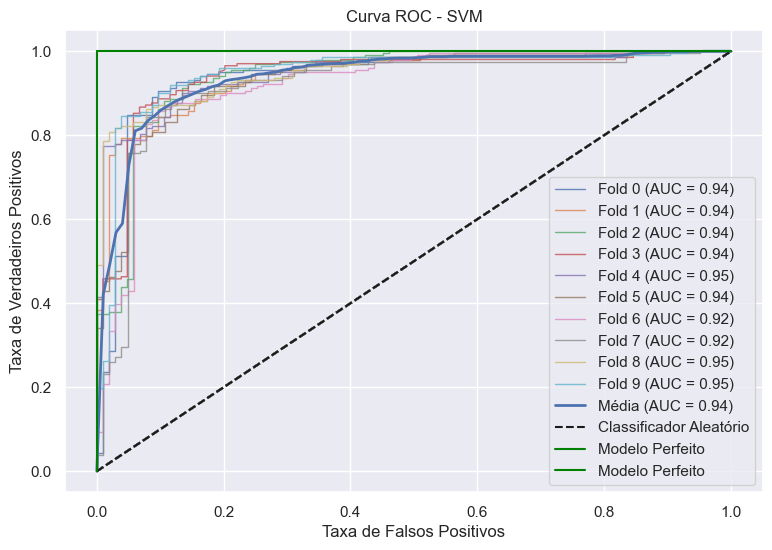

In [273]:
# Curva ROC - SVM
plt.figure(figsize=(9, 6))

tpr_list = []

for fold, (train_index, test_index) in enumerate(cv.split(x_train, y_train)):
    x_fold_train, x_fold_test = x_train.iloc[train_index], x_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    y_proba_svm = random_search_svc.predict_proba(x_fold_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_fold_test, y_proba_svm)
    roc_auc = auc(fpr, tpr)

    # Curva ROC para cada fold
    plt.plot(fpr, tpr, lw=1, alpha=0.8, label=f'Fold {fold} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Interpolação
    fprs = np.linspace(0, 1, 100)
    tprs = np.interp(fprs, fpr, tpr)
    tprs[0] = 0
    tpr_list.append(tprs)

    mean_tpr = np.mean(tpr_list, axis=0)
mean_auc = auc(fprs, mean_tpr)

# Curva ROC média
plt.plot(fprs, mean_tpr, color='b', label=f'Média (AUC = {mean_auc:.2f})', lw=2)

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - SVM')
plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')
plt.plot([0, 0], [0, 1],  label='Modelo Perfeito',color='green')
plt.plot([0, 1], [1, 1], label='Modelo Perfeito',color='green')
plt.legend(loc='lower right')
plt.show()

https://blogdozouza.wordpress.com/2019/04/16/validacao-cruzada-conceito-e-exemplo-em-r/


Questão 5. Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.

Eu escolhi o modelo svn por apresentar a melhor metrica = 0.92 

# Data Frame de vinho tinto.

In [279]:
df_red = df.drop(df.index[df['type'] == 'white'])
df_red

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
4898  red            7.4             0.700         0.00             1.9   
4899  red            7.8             0.880         0.00             2.6   
4900  red            7.8             0.760         0.04             2.3   
4901  red           11.2             0.280         0.56             1.9   
4902  red            7.4             0.700         0.00             1.9   
...   ...            ...               ...          ...             ...   
6492  red            6.2             0.600         0.08             2.0   
6493  red            5.9             0.550         0.10             2.2   
6494  red            6.3             0.510         0.13             2.3   
6495  red            5.9             0.645         0.12             2.0   
6496  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
4898      0.076                 11.0                  34.0  0.99780  3.51   
4899      0.098                 25.0                  67.0  0.99680  3.20   
4900      0.092                 15.0                  54.0  0.99700  3.26   
4901      0.075                 17.0                  60.0  0.99800  3.16   
4902      0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
4898       0.56      9.4        5  
4899       0.68      9.8        5  
4900       0.65      9.8        5  
4901       0.58      9.8        6  
4902       0.56      9.4        5  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[1599 rows x 13 columns]

In [282]:
df_red['opinion'] = df_red['quality'].apply(lambda x: 0 if x <= 5 else 1)
df_red = df_red.drop(columns=['quality','type'])

In [283]:
df_red_final = df_red.copy()
df_red_final = df_red_final.drop_duplicates().reset_index(drop=True)

In [285]:
df_red_final = df_red_final.dropna().reset_index(drop=True)

In [287]:
x_red = df_red_final.drop(['opinion'], axis=1)
y_red = df_red_final[['opinion']]

In [288]:
print(30*'=')
print('      SVM - BASE DE TESTE       ')
print(30*'=')

svm_pred_test = random_search_svc.predict(x_red)
    
acc_test = accuracy_score(y_red, svm_pred_test)
preci_test = precision_score(y_red, svm_pred_test)
recall_test = recall_score(y_red, svm_pred_test)
f1_test = f1_score(y_red, svm_pred_test)

acc_list_test.append(acc_test)
preci_list_test.append(preci_test)
recall_list_test.append(recall_test)
f1_list_test.append(f1_test)

mean_acc_test = np.mean(acc_list_test)
std_acc_test = np.std(acc_list_test)

mean_preci_test = np.mean(preci_list_test)
std_preci_test = np.std(preci_list_test)

mean_recall_test = np.mean(recall_list_test)
std_recall_test = np.std(recall_list_test)

mean_f1_test = np.mean(f1_list_test)
std_f1_test = np.std(f1_list_test)

print(f'Acurácia: {mean_acc_test:.4f}')
print(f'Precisão: {mean_preci_test:.4f}')
print(f'Recall: {mean_recall_test:.4f}')
print(f'F1-Score: {mean_f1_test:.4f}')

      SVM - BASE DE TESTE       
Acurácia: 0.7252
Precisão: 0.7644
Recall: 0.6592
F1-Score: 0.6951


Os resultados mostram a diferença na métricas d qacurácia, precisão, recal e f1_score. Isso mostra que como modelo foi treinados para vinhos brancos, existe diferença diferença em ao aplicar ao vinho tinto, haja vista que de fato o vinho tinto tem pelicularidades em relação ao vinho branco. 